In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
#Testing and showing results of raw transfer
from ultralytics import YOLO
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!rm -rf /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/labels/train.cache
!rm -rf /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/labels/val.cache


Performing inference on raw pretrained model...

image 1/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 104.jpg: 448x640 38 pomegranates, 8.9ms
image 2/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 121.jpg: 448x640 34 pomegranates, 8.1ms
image 3/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 123.jpg: 448x640 32 pomegranates, 8.0ms
image 4/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 126.jpg: 448x640 16 pomegranates, 8.5ms
image 5/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 128.jpg: 448x640 39 pomegranates, 8.0ms
image 6/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 14.jpg: 448x640 20 pomegranates, 8.0ms
image 7/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 141.jpg: 448x640 28 pomegranates, 8.5ms
image 8/116 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 143.jpg: 448x640 11 pome

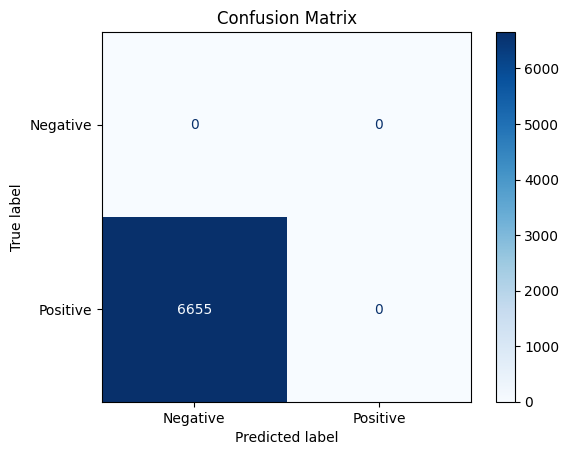

In [ ]:
#caculate IOU on pretraind model with my data
# Paths to images and pretrained model
test_images_folder = "/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val"  # Path to validation images
label_folder = "/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/lables/val"        # Path to validation labels (YOLO format)
pretrained_model_path = "/content/drive/MyDrive/Thesis/object detection/best.pt"      # Pretrained YOLOv8 model

# Step 1: Load the pretrained YOLO model
model = YOLO(pretrained_model_path)

# Step 2: Perform inference on validation images
print("Performing inference on raw pretrained model...")
results = model.predict(source=test_images_folder, save=False)

# Step 3: IoU, Precision, Recall, and Confusion Matrix Calculation
def calculate_metrics_and_cm(results, label_folder):
    total_iou = 0
    total_precision = 0
    total_recall = 0
    y_true = []  # Ground-truth labels for confusion matrix
    y_pred = []  # Predicted labels for confusion matrix
    num_images = len(results)

    for result in results:
        # Get predicted bounding boxes
        pred_boxes = result.boxes.xyxy.cpu().numpy()  # x1, y1, x2, y2
        image_name = os.path.basename(result.path)
        label_path = os.path.join(label_folder, os.path.splitext(image_name)[0] + ".txt")
        if not os.path.exists(label_path):
            continue

        # Get ground-truth boxes
        gt_boxes = []
        with open(label_path, 'r') as f:
            for line in f.readlines():
                values = line.strip().split()
                x_center, y_center, w, h = map(float, values[1:5])  # Only take the 2nd to 5th values
                x1 = (x_center - w / 2) * result.orig_shape[1]
                y1 = (y_center - h / 2) * result.orig_shape[0]
                x2 = (x_center + w / 2) * result.orig_shape[1]
                y2 = (y_center + h / 2) * result.orig_shape[0]
                gt_boxes.append([x1, y1, x2, y2])

        # Calculate IoU
        ious = []
        for gt_box in gt_boxes:
            max_iou = 0
            for pred_box in pred_boxes:
                xi1 = max(gt_box[0], pred_box[0])
                yi1 = max(gt_box[1], pred_box[1])
                xi2 = min(gt_box[2], pred_box[2])
                yi2 = min(gt_box[3], pred_box[3])
                inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

                gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
                union_area = gt_area + pred_area - inter_area

                iou = inter_area / union_area if union_area > 0 else 0
                max_iou = max(max_iou, iou)
            ious.append(max_iou)

        avg_iou = sum(ious) / len(ious) if ious else 0
        total_iou += avg_iou

        # True Positives, False Positives, False Negatives
        tp = sum(1 for iou in ious if iou > 0.5)  # True positives (IoU > 0.5)
        fp = len(pred_boxes) - tp                # False positives
        fn = len(gt_boxes) - tp                  # False negatives

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        total_precision += precision
        total_recall += recall

        # Update confusion matrix labels
        y_true.extend([1] * len(gt_boxes))  # Ground truth positives
        y_pred.extend([1 if iou > 0.5 else 0 for iou in ious])  # Predicted positives only for existing gt_boxes

    # Average metrics
    avg_precision = total_precision / num_images if num_images > 0 else 0
    avg_recall = total_recall / num_images if num_images > 0 else 0
    avg_iou = total_iou / num_images if num_images > 0 else 0

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    return avg_iou, avg_precision, avg_recall, cm

# Calculate metrics and confusion matrix
mean_iou, mean_precision, mean_recall, cm = calculate_metrics_and_cm(results, label_folder)

# Display Results
print("\nRaw Transfer Results:")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/labels/val.cache... 116 images, 0 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.50s/it]


                   all        116       6655      0.754      0.331      0.472      0.226
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/val
Raw transfer visualizations and metrics are saved in: runs/detect/val


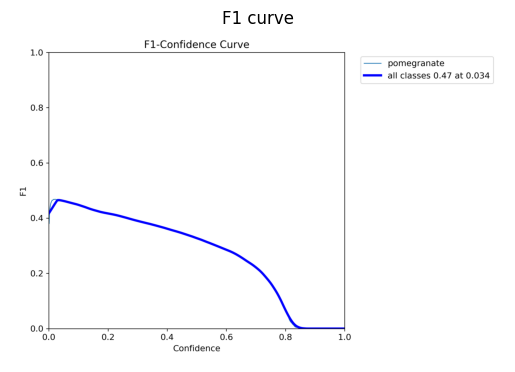

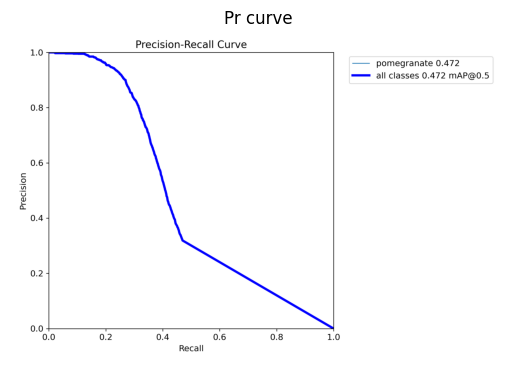

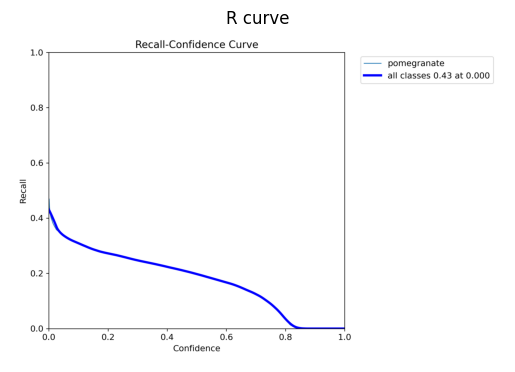

results.png not found in runs/detect/val


In [ ]:
#Check the valstion set on the pretraind model
pretrained_model_path = "/content/drive/MyDrive/Thesis/object detection/best.pt"      # Pretrained YOLOv8 model

# Step 1: Load the pretrained YOLO model
model2 = YOLO(pretrained_model_path)

# Run validation to evaluate the raw model on your dataset
metrics = model2.val(data="/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/golavTL.yaml", save=True)

# Access the directory where results are saved
results_dir = metrics.save_dir  # Correct way to access the save_dir attribute
print(f"Raw transfer visualizations and metrics are saved in: {results_dir}")

# Display specific graphs programmatically
def display_graph(graph_name, results_dir):
    file_path = os.path.join(results_dir, graph_name)
    if os.path.exists(file_path):
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(graph_name.split('.')[0].replace('_', ' ').capitalize())
        plt.show()
    else:
        print(f"{graph_name} not found in {results_dir}")

# List of curves to display
graphs_to_display = [
    "F1_curve.png",      # F1-Confidence Curve
    "PR_curve.png",      # Precision-Recall Curve
    "R_curve.png",       # Recall-Confidence Curve
    "results.png"        # Loss Curves and Metrics Overview
]

# Display each graph
for graph in graphs_to_display:
    display_graph(graph, results_dir)


In [ ]:
#Print images after raw tranfer
# Paths to the validation images and pretrained model
test_images_folder = '/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val'  # Path to validation images
output_folder = "/content/drive/MyDrive/Thesis/POM-IMG/Out_put_raw_TL"  # Folder to save output images
pretrained_model_path = "/content/drive/MyDrive/Thesis/object detection/best.pt"  # Pretrained YOLOv8 model

# Step 1: Load the pretrained model
model = YOLO(pretrained_model_path)

# Step 2: Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Step 3: Perform inference and save the visualized output
print("Performing inference and visualizing detections...")
for image_file in os.listdir(test_images_folder):
    if image_file.endswith(('.jpg', '.png')):
        # Load image
        image_path = os.path.join(test_images_folder, image_file)
        image = cv2.imread(image_path)

        # Perform inference
        results = model.predict(image_path, save=False, conf=0)

        # Draw detections on the image
        for result in results:
            for box, conf in zip(result.boxes.xyxy, result.boxes.conf):
                x1, y1, x2, y2 = map(int, box[:4])
                confidence = round(float(conf), 2)  # Extract confidence and round to 2 decimals

                # Draw bounding box (blue color)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 4)  # Blue box with thicker border

                # Add label with confidence
                label = f"Pomegranate {confidence:.2f}"
                font_scale = 5.0  # Larger label size
                font_thickness = 3
                text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)[0]
                text_x, text_y = x1, y1 - 10 if y1 - 10 > 10 else y1 + 20
                cv2.rectangle(image, (text_x, text_y - text_size[1] - 5),
                              (text_x + text_size[0] + 5, text_y + 5), (255, 0, 0), -1)  # Blue background for text
                cv2.putText(image, label, (text_x, text_y),
                            cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)  # White text

        # Save the output image
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, image)
        print(f"Saved: {output_path} with detections and confidence levels.")

print("Inference complete. Results saved to the output folder.")



Performing inference and visualizing detections...

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 14.jpg: 448x640 20 pomegranates, 9.0ms
Speed: 3.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_raw_TL/FRAME 14.jpg with detections and confidence levels.

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 23.jpg: 448x640 26 pomegranates, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_raw_TL/FRAME 23.jpg with detections and confidence levels.

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL/images/val/FRAME 25.jpg: 448x640 11 pomegranates, 8.4ms
Speed: 3.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_raw_TL/FRAME 25.jpg with de

In [4]:
#Transfer learning on the data set
# Paths to the YAML file and pretrained model
dataset_yaml = "/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/golavTL.yaml"  # Path to your YAML file
pretrained_model_path = "/content/drive/MyDrive/Thesis/object detection/best.pt"  # Pretrained YOLOv8 model

# Step 1: Load the pretrained model
model = YOLO(pretrained_model_path)

# Step 2: Fine-tune the model
model.train(data=dataset_yaml, epochs=50, batch=16, imgsz=640, patience=5, save=True, workers=4)

# Step 3: Evaluate the fine-tuned model
metrics = model.val()
print("Validation Results:", metrics)

# Step 4: Save the fine-tuned model
model.save("/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/finetuned_model_50.50.pt")
print("Fine-tuned model saved.")


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/golavTL.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Thesis/object detection/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=Fa

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
YOLOv8s summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 66.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.0 ms, read: 28.3±23.6 MB/s, size: 17842.5 KB)


train: Scanning /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/train... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:12<00:00, 24.84it/s]

train: New cache created: /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 235.4±474.7 MB/s, size: 21233.9 KB)


val: Scanning /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/val... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:11<00:00, 27.41it/s]


val: New cache created: /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.34G      2.084      2.204      1.217        331        640: 100%|██████████| 20/20 [00:54<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        308      17624      0.734      0.617       0.67      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         7G      1.749     0.9162      1.074        363        640: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        308      17624      0.769      0.631      0.711      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.04G       1.66     0.8457      1.045        359        640: 100%|██████████| 20/20 [00:47<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]

                   all        308      17624      0.798      0.687      0.766      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.66G      1.585     0.8068      1.019        276        640: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]


                   all        308      17624      0.829      0.686      0.782      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.29G       1.55      0.775      1.004        524        640: 100%|██████████| 20/20 [00:43<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        308      17624      0.809      0.696      0.786      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       8.3G      1.542     0.7701      1.002        343        640: 100%|██████████| 20/20 [00:43<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]


                   all        308      17624      0.839      0.708      0.806      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.34G      1.521     0.7583     0.9997        510        640: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]

                   all        308      17624       0.84      0.707      0.809      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.07G      1.502     0.7436     0.9856        382        640: 100%|██████████| 20/20 [00:46<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]

                   all        308      17624      0.838      0.703      0.809      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.07G      1.479     0.7347     0.9994        298        640: 100%|██████████| 20/20 [00:44<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]

                   all        308      17624      0.858      0.711      0.815       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.07G      1.462     0.7264     0.9763        505        640: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]

                   all        308      17624      0.861      0.717      0.823      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.07G      1.438     0.7056     0.9742        386        640: 100%|██████████| 20/20 [00:43<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

                   all        308      17624       0.86      0.731      0.831      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.07G      1.436     0.7052     0.9718        252        640: 100%|██████████| 20/20 [00:48<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]

                   all        308      17624      0.851      0.732      0.829      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.07G      1.432     0.7074     0.9688        198        640: 100%|██████████| 20/20 [00:44<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

                   all        308      17624      0.862      0.741      0.837      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.08G      1.416     0.6918     0.9666        301        640: 100%|██████████| 20/20 [00:44<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


                   all        308      17624      0.844      0.731      0.827      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.08G      1.407      0.698     0.9718        407        640: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

                   all        308      17624      0.862      0.739      0.839      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G       1.42     0.6904      0.966        497        640: 100%|██████████| 20/20 [00:43<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

                   all        308      17624      0.849      0.744      0.839      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.1G      1.394     0.6833     0.9588        626        640: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        308      17624      0.863      0.744      0.842      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.1G      1.415     0.6873     0.9666        385        640: 100%|██████████| 20/20 [00:42<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]

                   all        308      17624      0.862      0.747      0.845      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.1G      1.414     0.6855     0.9706        334        640: 100%|██████████| 20/20 [00:43<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]


                   all        308      17624      0.852      0.743      0.838      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.1G      1.409     0.6842     0.9658        403        640: 100%|██████████| 20/20 [00:45<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


                   all        308      17624       0.86       0.75      0.845      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.1G      1.417     0.6829     0.9591        356        640: 100%|██████████| 20/20 [00:43<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]


                   all        308      17624      0.861      0.754      0.848      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.1G      1.375      0.671     0.9596        368        640: 100%|██████████| 20/20 [00:46<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.60it/s]


                   all        308      17624      0.852      0.753      0.846      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.1G      1.379     0.6673     0.9577        293        640: 100%|██████████| 20/20 [00:47<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        308      17624      0.857      0.762       0.85      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.1G      1.358     0.6566     0.9548        329        640: 100%|██████████| 20/20 [00:45<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        308      17624       0.86      0.755      0.849      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.1G      1.376      0.671     0.9593        450        640: 100%|██████████| 20/20 [00:46<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]


                   all        308      17624      0.864      0.753      0.849      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.1G      1.368     0.6633     0.9517        451        640: 100%|██████████| 20/20 [00:44<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        308      17624      0.865      0.757      0.853      0.516
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 21, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.355 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8s summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


                   all        308      17624       0.86      0.755      0.848      0.517
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8s summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 3.4±4.4 ms, read: 448.9±377.8 MB/s, size: 10408.0 KB)


val: Scanning /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/val.cache... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]


                   all        308      17624      0.861      0.755      0.848      0.518
Speed: 1.2ms preprocess, 3.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train2
Validation Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3a093e85d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,  

In [5]:
#get metrics after fine tuning on the validtion set
pretrained_model_path1 = "/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/finetuned_model_50.50.pt"     # Pretrained YOLOv8 model
# Step 1: Load the pretrained YOLO model
model3 = YOLO(pretrained_model_path1)

# Run validation to evaluate the raw model on your dataset
metrics = model3.val(data="/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/golavTL.yaml", save=True)

# Access the directory where results are saved
results_dir = metrics.save_dir  # Correct way to access the save_dir attribute
print(f"Raw transfer visualizations and metrics are saved in: {results_dir}")

# Display specific graphs programmatically
def display_graph(graph_name, results_dir):
    file_path = os.path.join(results_dir, graph_name)
    if os.path.exists(file_path):
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(graph_name.split('.')[0].replace('_', ' ').capitalize())
        plt.show()
    else:
        print(f"{graph_name} not found in {results_dir}")

# List of curves to display
graphs_to_display = [
    "F1_curve.png",      # F1-Confidence Curve
    "PR_curve.png",      # Precision-Recall Curve
    "R_curve.png",       # Recall-Confidence Curve
    "results.png"        # Loss Curves and Metrics Overview
]

# Display each graph
for graph in graphs_to_display:
    display_graph(graph, results_dir)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 827.5±454.2 MB/s, size: 16678.6 KB)


val: Scanning /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code_50.50/labels/val.cache... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


                   all        308      17624      0.861      0.755      0.848      0.518
Speed: 0.5ms preprocess, 1.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val
Raw transfer visualizations and metrics are saved in: runs/detect/val
F1_curve.png not found in runs/detect/val
PR_curve.png not found in runs/detect/val
R_curve.png not found in runs/detect/val
results.png not found in runs/detect/val


In [ ]:
#Print images after finr tuning
# Paths to the validation images and pretrained model
test_images_folder = "/content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/images/val"  # Path to validation images
output_folder = "/content/drive/MyDrive/Thesis/POM-IMG/Out_put_FT_TL"  # Folder to save output images
pretrained_model_path1 = "/content/drive/MyDrive/Thesis/POM-IMG/Results_FT_TL/finetuned_model.pt"   # Pretrained YOLOv8 model

# Step 1: Load the pretrained model
model3 = YOLO(pretrained_model_path1)

# Step 2: Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Step 3: Perform inference and save the visualized output
print("Performing inference and visualizing detections...")
for image_file in os.listdir(test_images_folder):
    if image_file.endswith(('.jpg', '.png')):
        # Load image
        image_path = os.path.join(test_images_folder, image_file)
        image = cv2.imread(image_path)

        # Perform inference
        results = model3.predict(image_path, save=False, conf=0.25)

        # Draw detections on the image
        for result in results:
            for box, conf in zip(result.boxes.xyxy, result.boxes.conf):
                x1, y1, x2, y2 = map(int, box[:4])
                confidence = round(float(conf), 2)  # Extract confidence and round to 2 decimals

                # Draw bounding box (blue color)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 4)  # Blue box with thicker border

                # Add label with confidence
                label = f"Pomegranate {confidence:.2f}"
                font_scale = 2.0  # Larger label size
                font_thickness = 3
                text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)[0]
                text_x, text_y = x1, y1 - 10 if y1 - 10 > 10 else y1 + 20
                cv2.rectangle(image, (text_x, text_y - text_size[1] - 5),
                              (text_x + text_size[0] + 5, text_y + 5), (255, 0, 0), -1)  # Blue background for text
                cv2.putText(image, label, (text_x, text_y),
                            cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)  # White text

        # Save the output image
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, image)
        print(f"Saved: {output_path} with detections and confidence levels.")

print("Inference complete. Results saved to the output folder.")


Performing inference and visualizing detections...

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/images/val/FRAME 14.jpg: 448x640 47 pomegranates, 9.1ms
Speed: 3.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_FT_TL/FRAME 14.jpg with detections and confidence levels.

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/images/val/FRAME 23.jpg: 448x640 119 pomegranates, 8.3ms
Speed: 3.6ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_FT_TL/FRAME 23.jpg with detections and confidence levels.

image 1/1 /content/drive/MyDrive/Thesis/POM-IMG/Pom_object_TL_code/images/val/FRAME 25.jpg: 448x640 71 pomegranates, 8.4ms
Speed: 3.7ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Saved: /content/drive/MyDrive/Thesis/POM-IMG/Out_put_FT_TL/FRAME 2